In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from functools import reduce


In [2]:
df = pd.read_csv(os.path.join('..', 'data.csv'), sep=',')

In [3]:
df

,id,name,link,image,inputR1,inputR2,inputR3,inputT1,inputT2,inputT3,outputR1,outputR2,outputR3,outputT1,outputT2,outputT3,comments,created,transmission
0,3,Bevel gears,https://grabcad.com/library/parametric-bevel-g...,img/0002-bevelgears.jpg,1,0,0,0,0,0,0,1,0,0,0,0,NaN,2018-05-08 07:25:40.627309,10
1,4,Belt drive (quarter turn),https://www.youtube.com/watch?v=RpVSn_ZZCOI,img/0003-beltdrive-quarterturn.jpg,1,0,0,0,0,0,0,1,0,0,0,0,NaN,2018-05-08 07:26:13.541636,1
2,6,Two stage gearbox,https://grabcad.com/library/2-stage-gear-box,img/0005-twostage-gearbox.jpg,1,0,0,0,0,0,1,0,0,0,0,0,NaN,2018-05-08 07:27:38.854208,20
3,7,Cam follower,https://grabcad.com/library/cam-and-follower-13,img/0010-cam-follower.jpg,1,0,0,0,0,0,0,0,0,1,0,0,NaN,2018-05-08 07:28:21.610800,1
4,8,Belt drive (flat),http://507movements.com/mm_001.html,img/0014-beltdrive-flat.jpg,1,0,0,0,0,0,1,0,0,0,0,0,NaN,2018-05-08 07:28:57.759737,1
5,9,Hinge,https://grabcad.com/library/8-screw-post-strap...,img/0008-hinge.jpg,0,1,0,0,0,0,0,1,0,0,0,0,NaN,2018-05-08 07:30:03.885253,1
6,10,Coil spring,https://grabcad.com/library/spring-274,img/0011-coil-spring.jpg,0,0,0,1,0,0,0,0,0,1,0,0,NaN,2018-05-08 07:30:46.681121,10
7,11,Belt drive (crossed),http://507movements.com/mm_002.html,img/0016-beltdrive-crossed.jpg,1,0,0,0,0,0,1,0,0,0,0,0,NaN,2018-05-08 07:31:20.185759,1
8,12,Pulley (quarter turn),http://507movements.com/mm_003.html,img/0017-pulley-quarterturn.jpg,1,0,0,0,0,0,0,1,0,0,0,0,NaN,2018-05-08 07:31:54.990798,1
9,13,Chain drive,https://grabcad.com/library/chainsprocket-1,img/0015-chaindrive.jpg,1,0,0,0,0,0,1,0,0,0,0,0,NaN,2018-05-08 09:11:27.749600,1


In [4]:
inputRotations = ['inputR1', 'inputR2', 'inputR3']
inputTranslations = ['inputT1', 'inputT2', 'inputT3']
inputs = inputRotations + inputTranslations
outputRotations = ['outputR1', 'outputR2', 'outputR3']
outputTranslations = ['outputT1', 'outputR2', 'outputT3']
outputs = outputRotations + outputTranslations

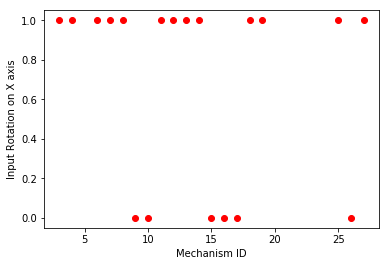

In [5]:
plt.plot(df['id'], df['inputR1'], 'ro')
plt.xlabel('Mechanism ID')
plt.ylabel('Input Rotation on X axis')
plt.show()

In [6]:
inRot = [df[col] for col in inputRotations]
inTrans = [df[col] for col in inputTranslations]
outRot = [df[col] for col in outputRotations]
outTrans = [df[col] for col in outputTranslations]

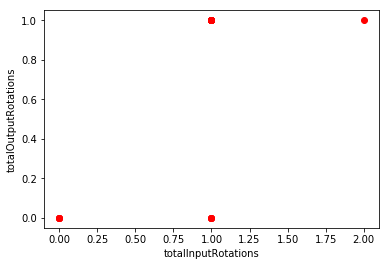

In [8]:
totalInputRotations = reduce((lambda x, y: x + y), inRot)
totalOutputRotations = reduce((lambda x, y: x + y), outRot)
plt.plot(totalInputRotations, totalOutputRotations, 'ro')
plt.xlabel('totalInputRotations')
plt.ylabel('totalOutputRotations')
plt.show()

In [9]:
#inRot
commonRotations = [a * b for a,b in zip(inRot, outRot)]
commonRotations

[0     0
 1     0
 2     1
 3     0
 4     1
 5     0
 6     0
 7     1
 8     0
 9     1
 10    0
 11    0
 12    0
 13    0
 14    0
 15    0
 16    0
 17    0
 18    0
 dtype: int64, 0     0
 1     0
 2     0
 3     0
 4     0
 5     1
 6     0
 7     0
 8     0
 9     0
 10    0
 11    0
 12    0
 13    0
 14    0
 15    0
 16    0
 17    0
 18    1
 dtype: int64, 0     0
 1     0
 2     0
 3     0
 4     0
 5     0
 6     0
 7     0
 8     0
 9     0
 10    0
 11    0
 12    0
 13    0
 14    0
 15    0
 16    0
 17    0
 18    0
 dtype: int64]